In [16]:
import pandas as pd
import numpy as np

# 데이터 전처리

In [17]:
# 데이터 불러오기
df = pd.read_csv('/Users/chan/Documents/공모전/월별_매출_data.csv')
df

,년,월,ATC,업체명,제품,제조사,판매금액,판매수량
0,2016년,1월,[A11] 비타민,경남제약,경남데일리디츄어블정,경남제약,3.368375e+07,2895.1
1,2016년,1월,[A11] 비타민,경남제약,경남비타민씨정,경남제약,1.377390e+08,7346.3
2,2016년,1월,[A11] 비타민,경남제약,경남씨플러스정,경남제약,1.445235e+07,406.9
3,2016년,1월,[A11] 비타민,경남제약,레모나씨플러스정,경남제약,1.779869e+07,367.9
4,2016년,1월,[A11] 비타민,경남제약,쎄토마연질캡슐,경남제약,2.541853e+07,1160.9
...,...,...,...,...,...,...,...,...
30369,2022년,2월,[A11] 비타민,한풍제약,파워비타비백정,한풍제약,1.992963e+07,334.0
30370,2022년,2월,[A11] 비타민,한풍제약,파워액티브정,한풍제약,1.143703e+06,38.0
30371,2022년,2월,[A11] 비타민,헤파가드,비타포유정,헤파가드,4.558930e+05,60.0
30372,2022년,2월,[A11] 비타민,현대약품,벤포액티브연질캡슐,현대약품,2.061129e+06,23.0


In [18]:
# 제품명 순서대로 정렬, 이후 년도 기준(월 기준)으로 재정렬
df = df.sort_values(['제품', '년'])

# ATC. 업체명, 제조사 제거 및 index 초기화
df1 = df[['년','월', '제품','판매금액', '판매수량']]
df1 = df1.reset_index()
df1 = df1[['년','월', '제품','판매금액', '판매수량']]
df1

,년,월,제품,판매금액,판매수량
0,2019년,8월,가나폴로연질캡슐,2.554002e+04,50.7
1,2019년,9월,가나폴로연질캡슐,2.554646e+04,50.7
2,2019년,11월,가나폴로연질캡슐,2.314663e+04,46.8
3,2016년,1월,감마마그빅연질캡슐,1.261204e+07,421.2
4,2016년,2월,감마마그빅연질캡슐,3.371061e+07,705.9
...,...,...,...,...,...
30369,2021년,7월,힙스브이파워정,1.527350e+06,22.0
30370,2021년,8월,힙스브이파워정,2.343920e+06,44.0
30371,2021년,9월,힙스브이파워정,7.364260e+05,21.0
30372,2021년,10월,힙스브이파워정,2.104997e+06,64.0


In [19]:
# 년 / 월 합치고, month 열로 만들기
df1['month'] = df1['년'] + df1['월']
df1 = df1[['month', '제품', '판매금액' , '판매수량']]

# 년/월 제거하고 pd 활용해서 datetime 형식으로 data 변경
df1['month'] = df1['month'].str.replace('년', '-')
df1['month'] = df1['month'].str.replace('월', '')
df1['month'] = pd.to_datetime(df1['month'])

/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_4977/120734115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['month'].str.replace('년', '-')
/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_4977/120734115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['month'].str.replace('월', '')
/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_4977/120734115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [20]:
df1

,month,제품,판매금액,판매수량
0,2019-08-01,가나폴로연질캡슐,2.554002e+04,50.7
1,2019-09-01,가나폴로연질캡슐,2.554646e+04,50.7
2,2019-11-01,가나폴로연질캡슐,2.314663e+04,46.8
3,2016-01-01,감마마그빅연질캡슐,1.261204e+07,421.2
4,2016-02-01,감마마그빅연질캡슐,3.371061e+07,705.9
...,...,...,...,...
30369,2021-07-01,힙스브이파워정,1.527350e+06,22.0
30370,2021-08-01,힙스브이파워정,2.343920e+06,44.0
30371,2021-09-01,힙스브이파워정,7.364260e+05,21.0
30372,2021-10-01,힙스브이파워정,2.104997e+06,64.0


# 특정 제품군 입력(아로나민, 비맥스 등 제품군이 공통적으로 가진 이름 입력)

In [23]:
# '아로나민'이 들어간 제품만 추출
df2 = df1[df1['제품'].str.contains('아로나민')]

In [24]:
df2

,month,제품,판매금액,판매수량
16037,2016-01-01,아로나민골드정,2.706481e+09,103829.7
16038,2016-02-01,아로나민골드정,2.642191e+09,99270.6
16039,2016-03-01,아로나민골드정,2.785435e+09,105491.1
16040,2016-04-01,아로나민골드정,2.282668e+09,85933.9
16041,2016-05-01,아로나민골드정,2.184596e+09,82340.7
...,...,...,...,...
16699,2021-10-01,아로나민케어콤플렉스정,2.546670e+07,1258.0
16700,2021-11-01,아로나민케어콤플렉스정,2.796922e+07,1392.0
16701,2021-12-01,아로나민케어콤플렉스정,3.146352e+07,1593.0
16702,2022-01-01,아로나민케어콤플렉스정,2.312286e+07,1135.0


In [25]:
# 보유 제품 목록 확인
df2['제품'].unique()

array(['아로나민골드정', '아로나민골드프리미엄정', '아로나민실버정', '아로나민실버프리미엄정', '아로나민씨플러스미니정',
       '아로나민씨플러스정', '아로나민아이정', '아로나민이맥스플러스정', '아로나민이엑스정', '아로나민케어디엠정',
       '아로나민케어리피정', '아로나민케어에이치티정', '아로나민케어콤플렉스정'], dtype=object)

# 특정 제품 검색(아로나민골드정, 아로나민골드프리미엄정 등 구체적인 제품명 입력)

In [26]:
# 원하는 특정 제품만 이름 넣어서 추출
df3 = df2.loc[df2['제품'] == '아로나민골드정']
df3

,month,제품,판매금액,판매수량
16037,2016-01-01,아로나민골드정,2.706481e+09,103829.7
16038,2016-02-01,아로나민골드정,2.642191e+09,99270.6
16039,2016-03-01,아로나민골드정,2.785435e+09,105491.1
16040,2016-04-01,아로나민골드정,2.282668e+09,85933.9
16041,2016-05-01,아로나민골드정,2.184596e+09,82340.7
...,...,...,...,...
16106,2021-10-01,아로나민골드정,2.029961e+09,109953.0
16107,2021-11-01,아로나민골드정,1.895819e+09,111067.0
16108,2021-12-01,아로나민골드정,1.942650e+09,97557.0
16109,2022-01-01,아로나민골드정,1.531513e+09,78753.0


# 시각화

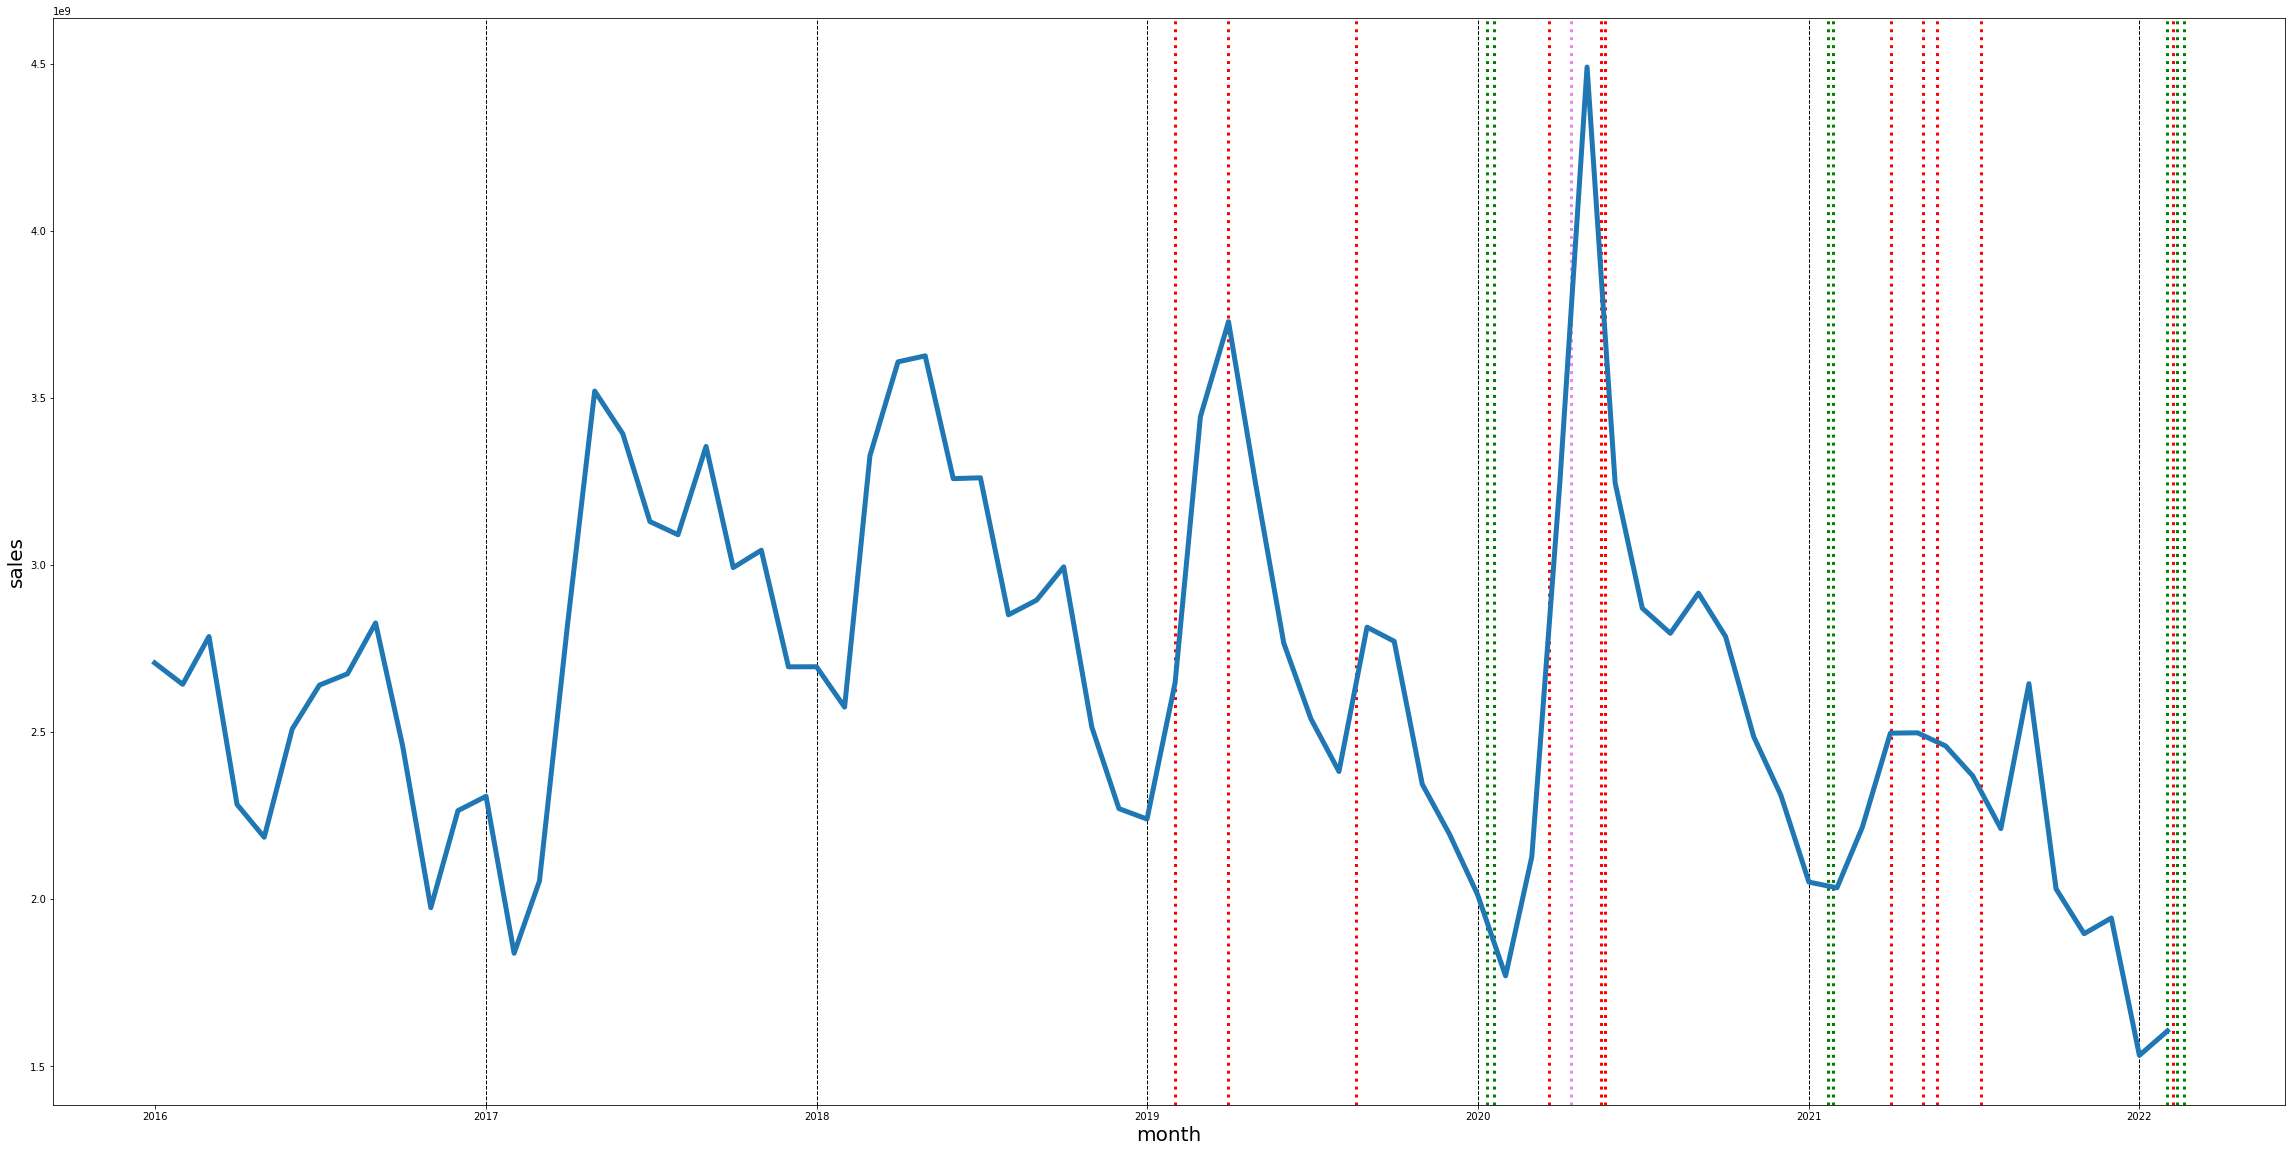

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
x = df3['month']
y = df3['판매금액']


plt.figure(figsize= (40, 20))
plt.xlabel('month', fontsize=20)
plt.ylabel('sales', fontsize=20)


# 연간 기준선
plt.axvline(x=pd.to_datetime('2017-01-01'), color='k', linestyle='--', linewidth=1)
plt.axvline(x=pd.to_datetime('2018-01-01'), color='k', linestyle='--', linewidth=1)
plt.axvline(x=pd.to_datetime('2019-01-01'), color='k', linestyle='--', linewidth=1)
plt.axvline(x=pd.to_datetime('2020-01-01'), color='k', linestyle='--', linewidth=1)
plt.axvline(x=pd.to_datetime('2021-01-01'), color='k', linestyle='--', linewidth=1)
plt.axvline(x=pd.to_datetime('2022-01-01'), color='k', linestyle='--', linewidth=1)

### 자사광고
# 아로나민 골드 광고
plt.axvline(x=pd.to_datetime('2019-02-01'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2019-03-31'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2019-08-20'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2020-03-20'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2020-05-21'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-04-02'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-05-07'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-05-22'), color='r', linestyle=':', linewidth=3)
#plt.axvline(x=pd.to_datetime('2021-07-09'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-07-10'), color='r', linestyle=':', linewidth=3)
#plt.axvline(x=pd.to_datetime('2021-07-11'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2022-02-07'), color='r', linestyle=':', linewidth=3)


# 아로나민 씨플러스
plt.axvline(x=pd.to_datetime('2020-05-16'), color='r', linestyle=':', linewidth=3)


### 경쟁사 광고
# GC녹십자 비맥스메타정
plt.axvline(x=pd.to_datetime('2020-01-11'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2020-01-19'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-01-22'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-01-28'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2022-02-01'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2022-02-12'), color='g', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2022-02-19'), color='g', linestyle=':', linewidth=3)


# 글락소 스미스 클라인 센트룸
plt.axvline(x=pd.to_datetime('2020-04-13'), color='violet', linestyle=':', linewidth=3)



plt.plot(x, y, linewidth=5)